In [1]:
import pandas as pd
#Load the dataset
df = pd.read_csv('C:/Users/anjan/OneDrive/Desktop/MSC Project reference papers/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape

(7043, 21)

In [3]:
#Checking null values
df.isnull().head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#Checking duplicates
df.duplicated().sum()

0

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#Type conversion
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df[['SeniorCitizen', 'TotalCharges']].dtypes

SeniorCitizen    category
TotalCharges      float64
dtype: object

In [8]:
# Checking if there are any missing values were created
df['TotalCharges'].isnull().sum()

11

In [9]:
#Dropping the rows where the Column 'TotalCharges' has null values
df = df.dropna(subset=['TotalCharges'])
df['TotalCharges'].isnull().sum()

0

In [10]:
#Dropping the column 'CustomerID' as its not useful
df = df.drop('customerID', axis=1)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
#Finding categorical columns
df.select_dtypes(include=['object', 'category']).columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [12]:
#One-hot encoding to change the categorical columns to Binary
df_model = pd.get_dummies(df, drop_first=True)
df_model.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [13]:
#train-Test Split
from sklearn.model_selection import train_test_split

X = df_model.drop('Churn_Yes', axis=1)  # All features
y = df_model['Churn_Yes']              # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
y.value_counts(normalize=True)

Churn_Yes
False    0.734215
True     0.265785
Name: proportion, dtype: float64

In [15]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_sm))

Original dataset shape Counter({False: 4130, True: 1495})
Resampled dataset shape Counter({False: 4130, True: 4130})


In [16]:
#Installing XgBoost
!pip install xgboost

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\anjan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:33:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[890 143]
 [169 205]]
              precision    recall  f1-score   support

       False       0.84      0.86      0.85      1033
        True       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



In [18]:
#SMOTE:# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train
xgb.fit(X_train_sm, y_train_sm)

# Predict
y_pred = xgb.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[868 165]
 [157 217]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.84      1033
        True       0.57      0.58      0.57       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



C:\Users\anjan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:33:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.77


In [20]:
# import numpy as np
# importance_scores = xgb.feature_importances_
# indices = np.argsort(importance_scores)[::-1]
# for f in range(15):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importance_scores[indices[f]]))
# top_feature_names = [X_train.columns[i] for i in indices[:20]][::-1]

In [21]:
print(xgb.feature_names_in_)

['tenure' 'MonthlyCharges' 'TotalCharges' 'gender_Male' 'SeniorCitizen_1'
 'Partner_Yes' 'Dependents_Yes' 'PhoneService_Yes'
 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No internet service' 'OnlineSecurity_Yes'
 'OnlineBackup_No internet service' 'OnlineBackup_Yes'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No internet service' 'TechSupport_Yes'
 'StreamingTV_No internet service' 'StreamingTV_Yes'
 'StreamingMovies_No internet service' 'StreamingMovies_Yes'
 'Contract_One year' 'Contract_Two year' 'PaperlessBilling_Yes'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']


In [22]:

# import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6))
# plt.barh(range(20), importance_scores[indices[:20][::-1]])  
# plt.yticks(range(20), top_feature_names)
# plt.xlabel("Importance Score")
# plt.title("Top 20 Feature Importances")
# plt.tight_layout()
# plt.show()

In [23]:
#top_features = [X_train.columns[i] for i in indices[:15]]  

# Filter datasets to keep only top features
#X_train_top = X_train[top_features]
#X_test_top = X_test[top_features]

In [24]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=42)
#X_train_top_sm, y_train_sm = sm.fit_resample(X_train_top, y_train)


In [25]:
# from xgboost import XGBClassifier
# import numpy as np

# # Step 1: Calculate scale_pos_weight from actual class imbalance
# neg, pos = np.bincount(y_train)
# scale = neg / pos

# # Step 2: Rebuild model with scale_pos_weight
# xgb = XGBClassifier(
#     n_estimators=200,
#     max_depth=5,
#     learning_rate=0.05,
#     subsample=0.9,
#     colsample_bytree=0.9,
#     scale_pos_weight=scale,
#     eval_metric='logloss',
#     use_label_encoder=False,
#     random_state=42
# )

# # Step 3: Fit on original X_train (NOT SMOTE)
# xgb.fit(X_train, y_train)

# # Step 4: Predict and evaluate
# y_pred = xgb.predict(X_test)

# from sklearn.metrics import accuracy_score, classification_report
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [26]:
# y_proba = xgb.predict_proba(X_test)[:, 1]

# for thresh in [0.45, 0.5, 0.55, 0.88, 0.85, 0.80, 0.78, 0.79]:
#     y_pred_thresh = (y_proba >= thresh).astype(int)
#     print(f"\nThreshold: {thresh}")
#     print("Accuracy:", accuracy_score(y_test, y_pred_thresh))


In [27]:
# y_pred_08 = (y_proba >= 0.80).astype(int)
# print(classification_report(y_test, y_pred_08))

In [28]:
!pip install shap

In [29]:
import shap
shap.initjs()

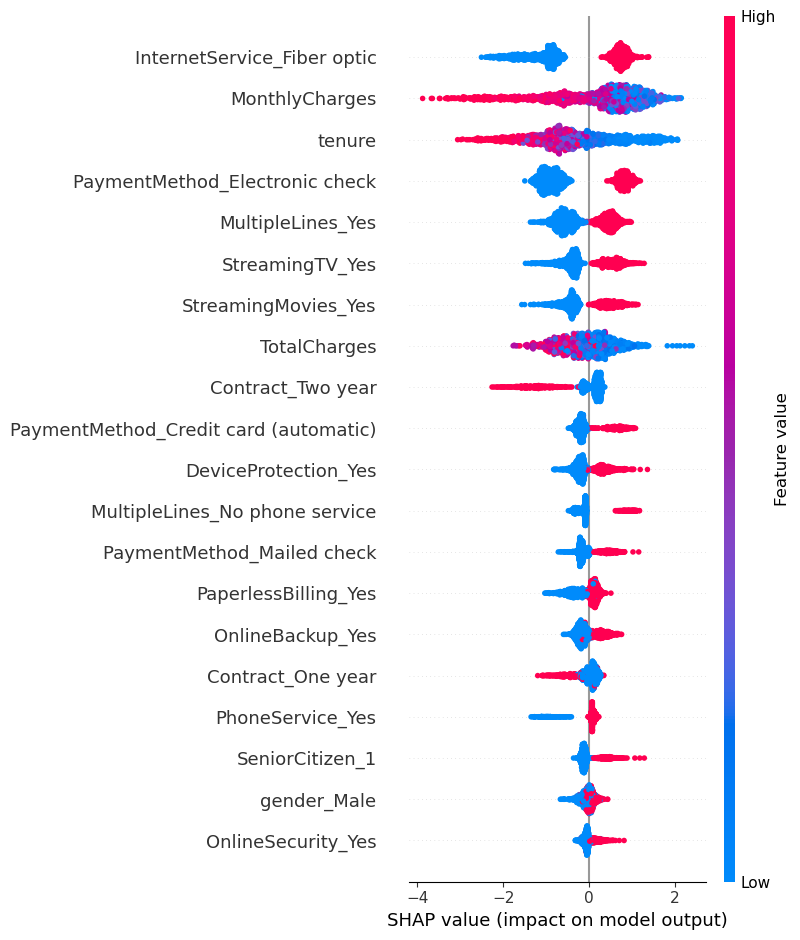

In [30]:
# get shap values
explainer = shap.Explainer(xgb)
# shap_values = explainer(X)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

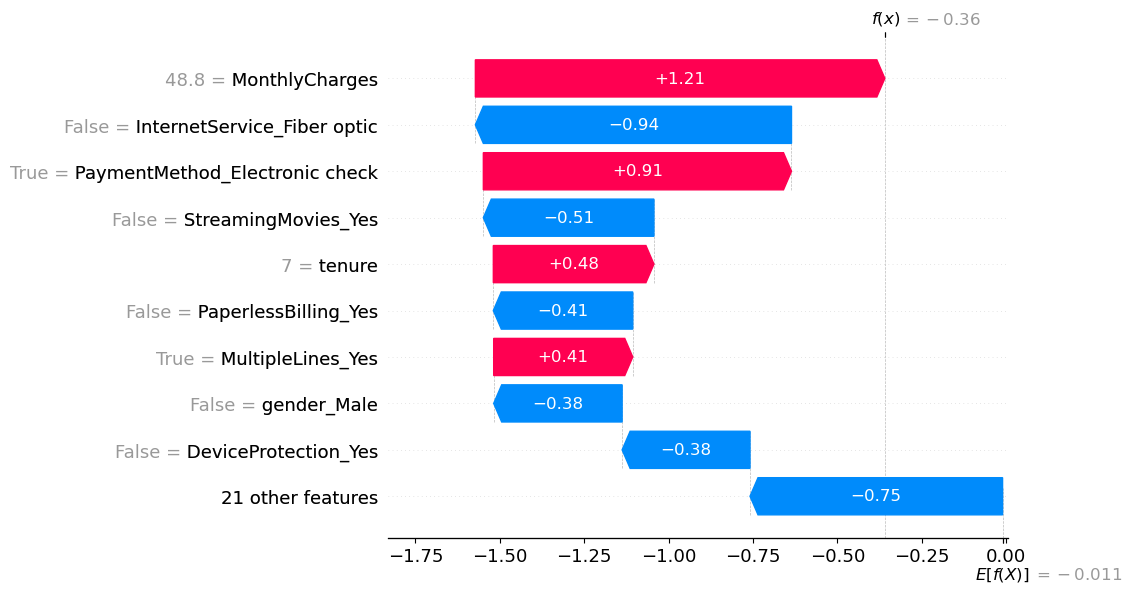

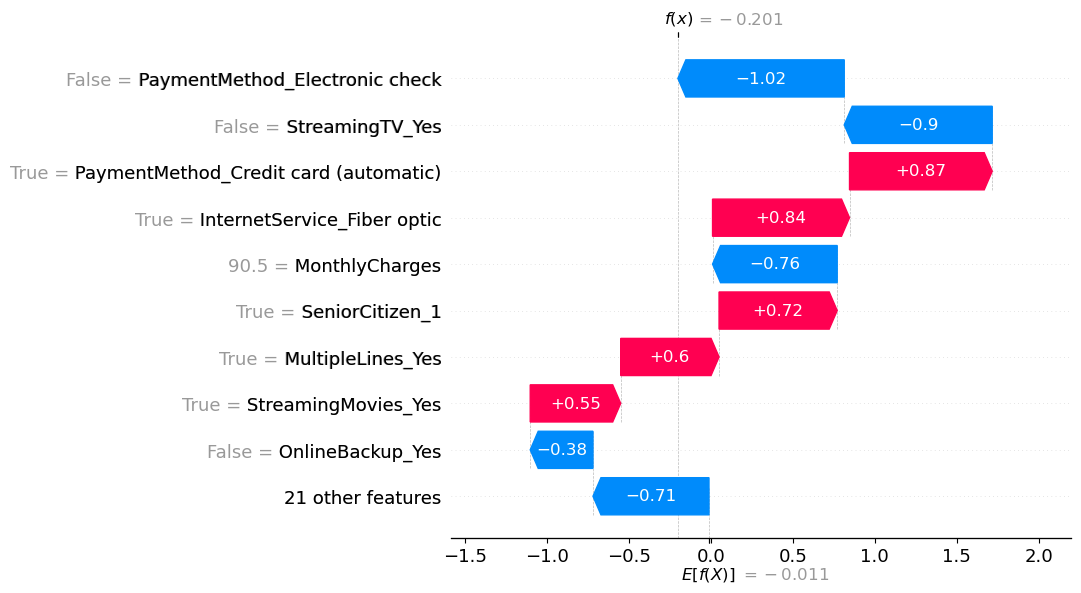

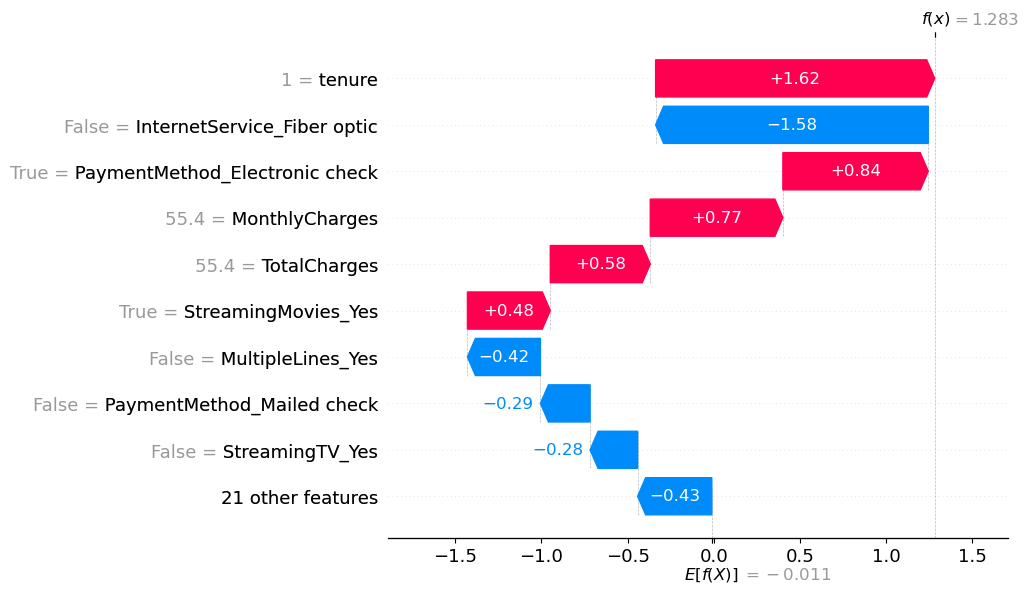

In [31]:
#local Explanation
# # Pick a sample row from X_test
# single_customer = X_test.iloc[1008:1009]
# shap_value_single = explainer(single_customer)
# shap.plots.waterfall(shap_value_single[0])
# Example: Get SHAP explanations for 3 different customers

for i in [1008, 234, 456]:  
    single_customer = X_test.iloc[i:i+1]
    shap_value_single = explainer(single_customer)
    shap.plots.waterfall(shap_value_single[0])


In [32]:
pip install fairlearn

Note: you may need to restart the kernel to use updated packages.


In [34]:
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
# Choose the sensitive attribute
sensitive_feature = X_test['gender_Male'] 
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, demographic_parity_ratio

# MetricFrame for selection rate
mf_selection = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sensitive_feature
)

print("Selection Rate by Gender (0 = Female, 1 = Male):")
print(mf_selection.by_group)

# Demographic Parity Difference
dp_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_feature)
print("Demographic Parity Difference:", round(dp_diff, 3))

# Demographic Parity Ratio
dp_ratio = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_feature)
print("Demographic Parity Ratio:", round(dp_ratio, 3))



Selection Rate by Gender (0 = Female, 1 = Male):
gender_Male
False    0.254038
True     0.287879
Name: selection_rate, dtype: float64
Demographic Parity Difference: 0.034
Demographic Parity Ratio: 0.882


In [36]:
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
# Choose the sensitive attribute
sensitive_feature = X_test['SeniorCitizen_1']  

mf_selection = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sensitive_feature
)

print("Selection Rate by SeniorCitizen (0 = if age<60, 1 = age >60):")
print(mf_selection.by_group)

# Demographic Parity Difference
dp_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_feature)
print("Demographic Parity Difference:", round(dp_diff, 3))

# Demographic Parity Ratio
dp_ratio = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_feature)
print("Demographic Parity Ratio:", round(dp_ratio, 3))



Selection Rate by SeniorCitizen (0 = if age<60, 1 = age >60):
SeniorCitizen_1
False    0.234894
True     0.456897
Name: selection_rate, dtype: float64
Demographic Parity Difference: 0.222
Demographic Parity Ratio: 0.514


In [38]:
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
# Choose the sensitive attribute
sensitive_feature = X_test['Partner_Yes']  

mf_selection = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sensitive_feature
)

print("Selection Rate by Partner_Yes:")
print(mf_selection.by_group)

# Demographic Parity Difference
dp_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_feature)
print("Demographic Parity Difference:", round(dp_diff, 3))

# Demographic Parity Ratio
dp_ratio = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_feature)
print("Demographic Parity Ratio:", round(dp_ratio, 3))

Selection Rate by Partner_Yes:
Partner_Yes
False    0.366310
True     0.163885
Name: selection_rate, dtype: float64
Demographic Parity Difference: 0.202
Demographic Parity Ratio: 0.447


In [39]:
# Partner feature (1 = Has Partner)
eo_diff_partner = equalized_odds_difference(y_test, y_pred, sensitive_features=X_test['Partner_Yes'])
print("Equalized Odds Difference by Partner:", round(eo_diff_partner, 3))


Equalized Odds Difference by Partner: 0.241


In [40]:
# SeniorCitizen feature (1 = age > 60)
eo_diff_senior = equalized_odds_difference(y_test, y_pred, sensitive_features=X_test['SeniorCitizen_1'])
print("Equalized Odds Difference by SeniorCitizen:", round(eo_diff_senior, 3))


Equalized Odds Difference by SeniorCitizen: 0.172


In [41]:
# Gender feature (1 = Male)
eo_diff_gender = equalized_odds_difference(y_test, y_pred, sensitive_features=X_test['gender_Male'])
print("Equalized Odds Difference by Gender:", round(eo_diff_gender, 3))


Equalized Odds Difference by Gender: 0.112
